# Data Description:

We will be using the https://www.kaggle.com/datasets/adeniranstephen/obesity-prediction-dataset?resource=download database, which was built to estimate obesity levels based on eating habits, family history and physical condition. It includes data from individuals in Mexico, Peru, and Colombia, covering 16 lifestyle and health-related features with 2111 records. The labels classify obesity levels, ranging from underweight to different obesity types.

Most of the data was generated using synthetic techniques, while some were collected directly from users through a web platform. It is useful for classification, regression, and clustering tasks.

Source: UCI Machine Learning Repository

## Column Descriptions:
- Gender – Male or Female.
- Age – The person’s age in years.
- Height – Height in meters.
- Weight – Weight in kilograms.
- family_history_with_overweight – Whether the person has a family history of being overweight (yes/no).
- FAVC – If the person frequently consumes high-calorie foods (yes/no).
- FCVC – Frequency of vegetable consumption (scale from 1 to 3).
- NCP – Number of main meals per day.
- CAEC – Frequency of consuming food between meals (Never, Sometimes, Frequently, Always).
- SMOKE – Whether the person smokes (yes/no).
- CH2O – Daily water intake (scale from 1 to 3).
- SCC – If the person monitors their calorie intake (yes/no).
- FAF – Physical activity frequency (scale from 0 to 3).
- TUE – Time spent using technology (scale from 0 to 3).
- CALC – Frequency of alcohol consumption (Never, Sometimes, Frequently, Always).
- MTRANS – Main mode of transportation (Automobile, Bike, Motorbike, Public Transportation, Walking).
- **NObeyesdad** (used as label) – Obesity level (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III).




In [1]:
!pip install seaborn  
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install kagglehub[pandas-datasets]


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
import seaborn as sns, pandas as pd, numpy as np , matplotlib.pyplot as plt

In [3]:

data = pd.read_csv("./data/ObesityDataSet_raw_and_data_sinthetic.csv" , sep=',')
print(data.columns)


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


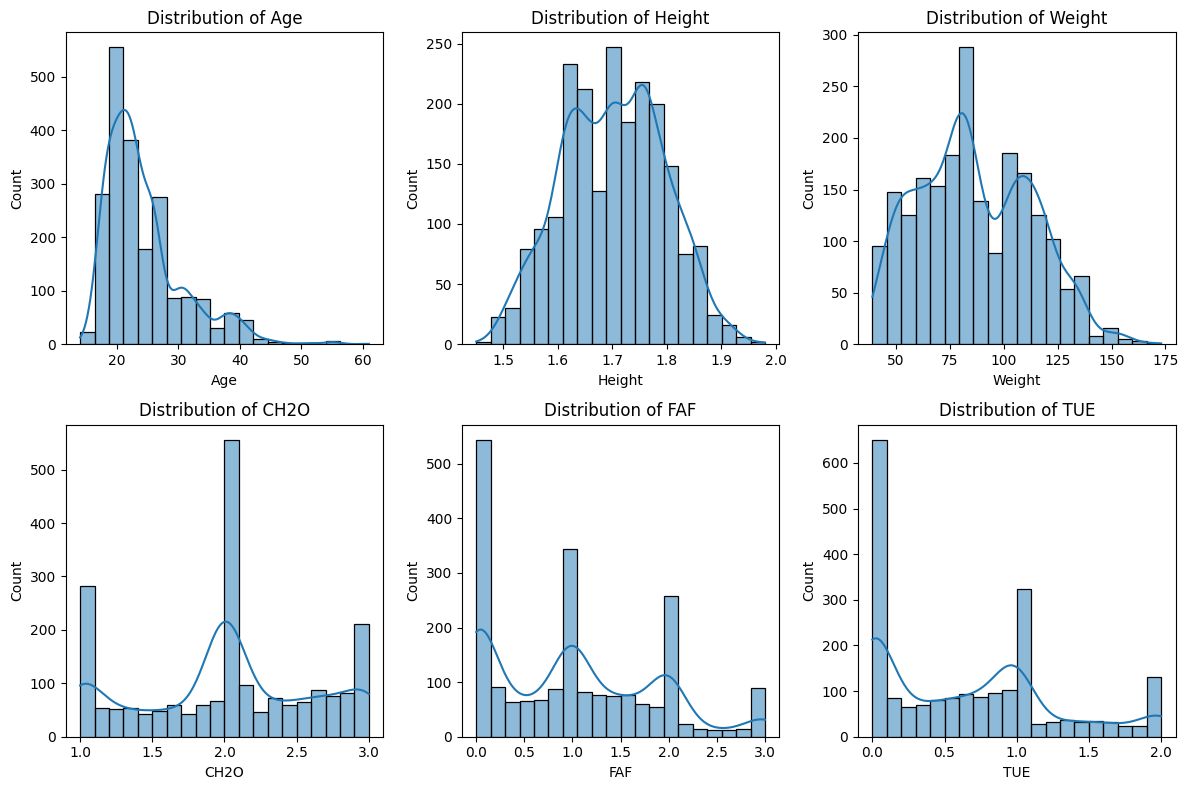

In [4]:
# Select numerical columns
numerical_features = ["Age", "Height", "Weight", "CH2O", "FAF", "TUE"]

# Plot histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

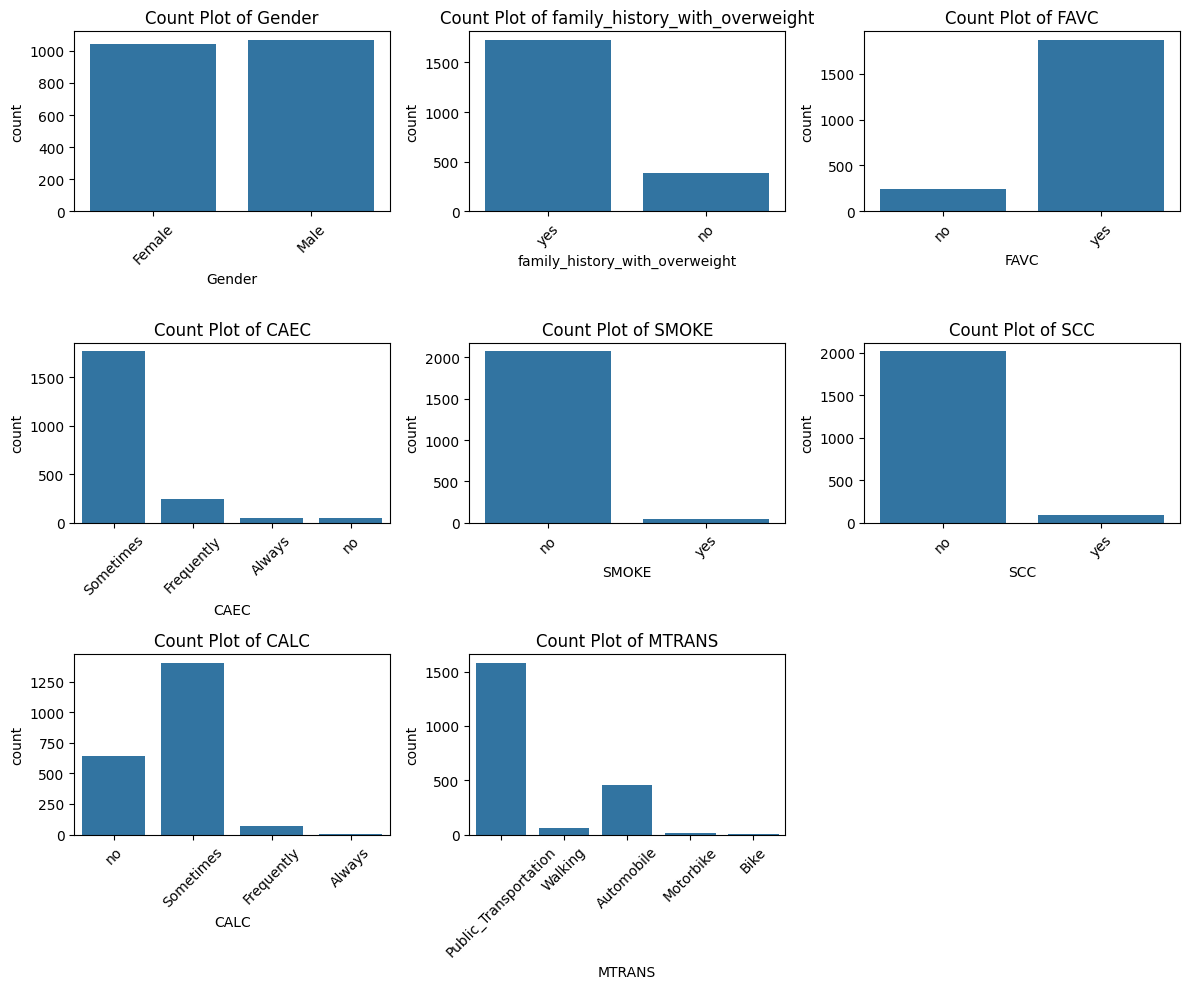

In [5]:
categorical_features = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]

plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=data, x=col)
    plt.xticks(rotation=45)
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()


# Main objective(s) of this analysis:
The primary goal of this analysis is to use lifestyle factors to classify an individual's risk of obesity, enabling early intervention and health recommendations. This involves:

- Identifying key lifestyle patterns that contribute to obesity.
- Building different classification models to predict obesity levels based on features and select the best. Models analysed will be :
1) SVM
2) Random Forest
3) Gradient boosting
  


# Variation of classification models:
## classificator #1:  SVM

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Convert categorical features into numerical values
df_encoded = data.copy()
for col in categorical_features:
    df_encoded[col] = LabelEncoder().fit_transform(data[col])

# Separate features and target
X = df_encoded.drop(columns=["NObeyesdad"])  # Features
y = df_encoded["NObeyesdad"]  # Target (Obesity levels)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
# Train SVM Model
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

In [8]:
# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8936170212765957
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.95      0.94        56
      Normal_Weight       0.75      0.84      0.79        62
     Obesity_Type_I       0.95      0.91      0.93        78
    Obesity_Type_II       0.93      0.98      0.96        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.80      0.73      0.77        56
Overweight_Level_II       0.87      0.82      0.85        50

           accuracy                           0.89       423
          macro avg       0.89      0.89      0.89       423
       weighted avg       0.89      0.89      0.89       423



### Analysis of SVM Classification Results for Obesity Prediction

#### **1) Overall Model Performance**
- **Accuracy: 89.36%**  
  - The SVM model correctly classified **89.36% of test samples**.
  - Since this is a **multi-class problem**, we also need to evaluate **precision, recall, and F1-score**.

---

#### **2) Precision, Recall, and F1-Score Explained**
| **Metric** | **Definition** | **Interpretation** |
|------------|---------------|------------------|
| **Precision** | TP / (TP + FP) | Of the predicted cases for a class, how many were actually correct? |
| **Recall (Sensitivity)** | TP / (TP + FN) | How well did the model identify all actual cases of the class? |
| **F1-Score** | Harmonic mean of precision & recall | A balance between precision and recall, useful for imbalanced datasets. |

**A higher F1-score means the model is performing well in both precision and recall.**

---

#### **3) Breakdown of Model Performance by Obesity Category**
| **Obesity Category** | **Precision** | **Recall** | **F1-Score** | **Support (Samples)** | **Interpretation** |
|----------------------|--------------|-----------|------------|-----------------|-----------------|
| **Insufficient Weight** | 0.93 | 0.95 | 0.94 | 56 | The model correctly identifies underweight cases **very well**. |
| **Normal Weight** | 0.75 | 0.84 | 0.79 | 62 | The model **misclassifies some normal-weight cases**. |
| **Obesity Type I** | 0.95 | 0.91 | 0.93 | 78 | Good performance, but a few cases misclassified  |
| **Obesity Type II** | 0.93 | 0.98 | 0.96 | 58 | **Excellent performance**, very few cases are missed. |
| **Obesity Type III** | 1.00 | 1.00 | 1.00 | 63 | **Perfect classification for extreme obesity cases**. |
| **Overweight Level I** | 0.80 | 0.73 | 0.77 | 56 | **Lower recall (73%) suggests some overweight Level I cases are misclassified ** |
| **Overweight Level II** | 0.87 | 0.82 | 0.85 | 50 | Good performance, but recall could be slightly improved. |


---

#### **4) Macro Avg vs. Weighted Avg**
| **Metric** | **Value** | **Interpretation** |
|------------|----------|------------------|
| **Macro Avg** | 0.89 | Averages across all classes (treats all equally). |
| **Weighted Avg** | 0.89 | Adjusts for class imbalance (weighted by number of samples per class). |

Since **both averages are equal**, class imbalance does **not significantly impact model performance**.




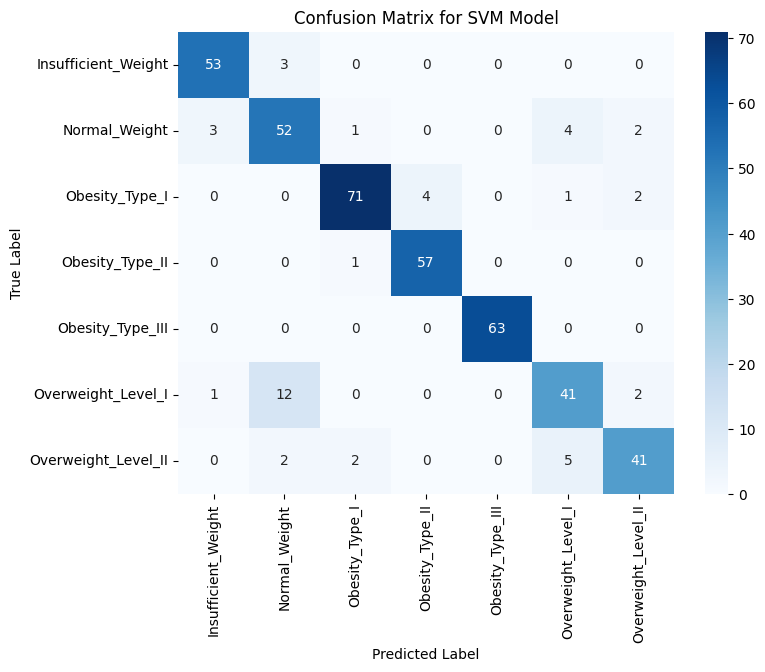

In [9]:
from sklearn.metrics import confusion_matrix

# generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for SVM Model")
plt.show()

## classificator #2: random forest

Random Forest Accuracy: 0.9622
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       1.00      0.98      0.99        56
      Normal_Weight       0.89      0.95      0.92        62
     Obesity_Type_I       0.99      0.97      0.98        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.91      0.88      0.89        56
Overweight_Level_II       0.98      0.96      0.97        50

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.96       423
       weighted avg       0.96      0.96      0.96       423



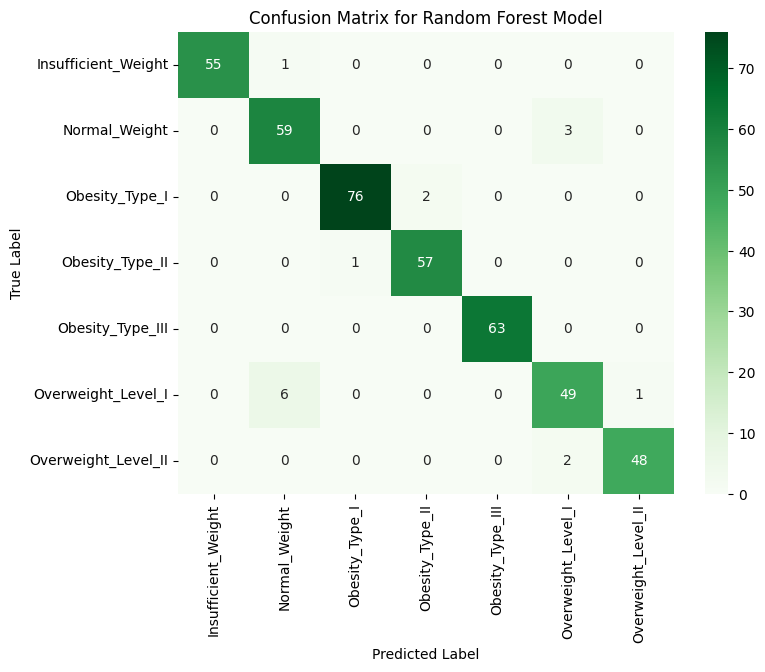

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest
rf_model.fit(X_train, y_train)  # Train the model on the training dataset

# Make predictions on the test dataset
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)  # Compute accuracy
classification_rep_rf = classification_report(y_test, y_pred_rf)  # Generate classification report

# Print results
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("Classification Report:\n", classification_rep_rf)

# Generate the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()


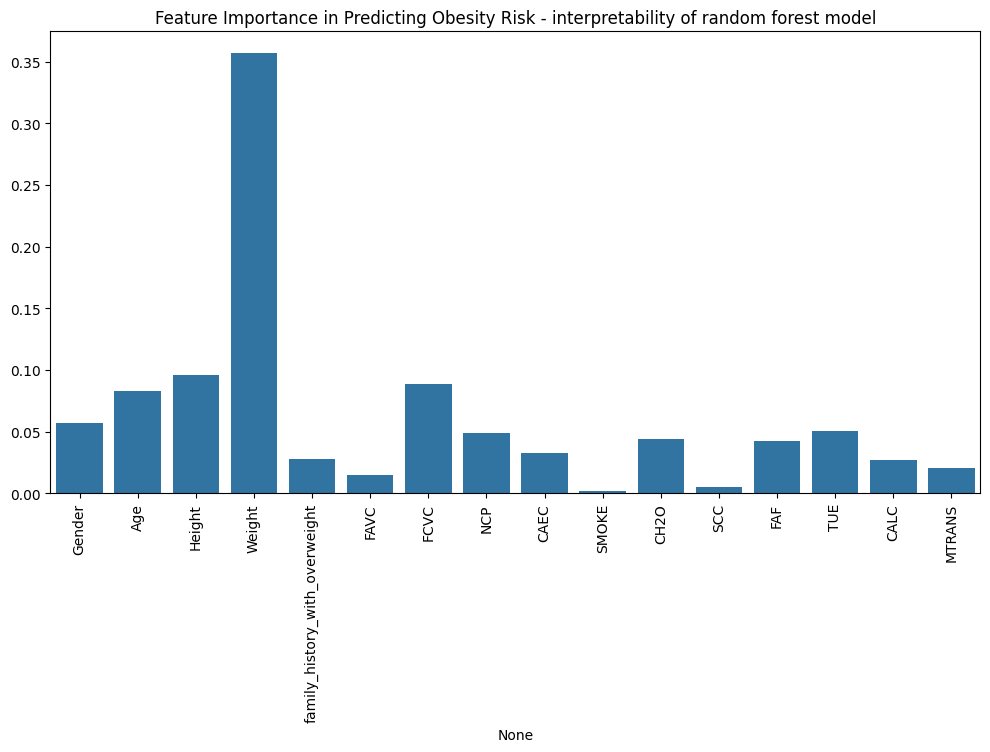

In [11]:
importances = rf_model.feature_importances_
plt.figure(figsize=(12, 6))
sns.barplot(x=X.columns, y=importances)
plt.xticks(rotation=90)
plt.title("Feature Importance in Predicting Obesity Risk - interpretability of random forest model")
plt.show()

### classificator #3: Gradient boosting

Gradient Boosting Accuracy: 0.9456
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.93      0.98      0.96        56
      Normal_Weight       0.93      0.85      0.89        62
     Obesity_Type_I       0.97      0.92      0.95        78
    Obesity_Type_II       0.93      0.98      0.96        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.87      0.93      0.90        56
Overweight_Level_II       0.98      0.96      0.97        50

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.95      0.95      0.95       423



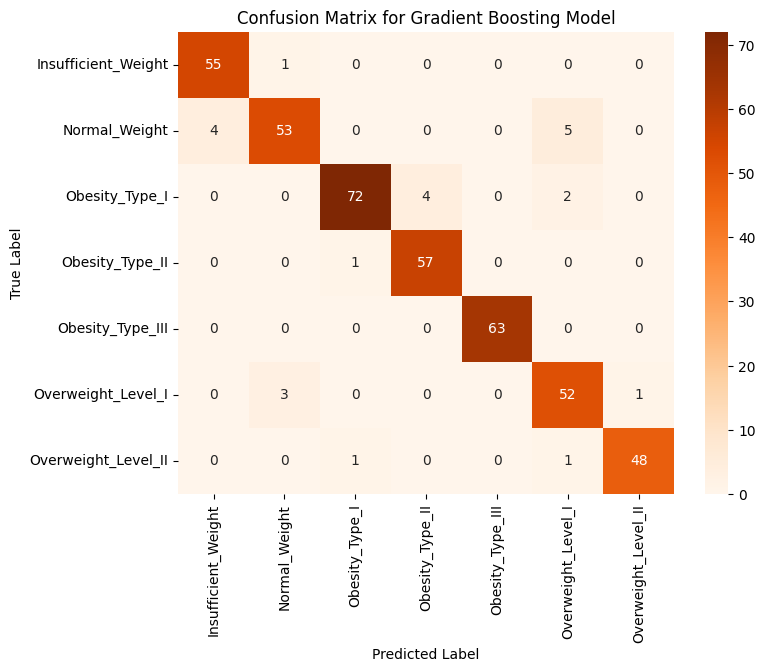

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred_gb = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

# Print results
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")
print("Classification Report:\n", classification_rep_gb)

# Generate the confusion matrix for Gradient Boosting
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Plot the confusion matrix for Gradient Boosting
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Oranges", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Gradient Boosting Model")
plt.show()

### Gradient Boosting Model Analysis for Obesity Classification

#### **1) Overall Model Performance**
- **Accuracy: 94.56%**  
  - The model correctly classified **94.56% of test cases**.
  - Since this dataset has **multiple obesity categories**, we analyze **precision, recall, and F1-score**.

---

#### **2) Precision, Recall, and F1-Score Breakdown**
| **Obesity Category** | **Precision** | **Recall** | **F1-Score** | **Support (Samples)** | **Interpretation** |
|----------------------|--------------|-----------|------------|-----------------|-----------------|
| **Insufficient Weight** | 0.93 | 0.98 | 0.96 | 56 | High recall (98%) means the model identifies underweight cases very well. |
| **Normal Weight** | 0.93 | 0.85 | 0.89 | 62 | Some normal-weight cases are misclassified as overweight. |
| **Obesity Type I** | 0.97 | 0.92 | 0.95 | 78 | The model performs well but occasionally misclassifies between obesity types. |
| **Obesity Type II** | 0.93 | 0.98 | 0.96 | 58 | Excellent performance, high recall (98%). |
| **Obesity Type III** | 1.00 | 1.00 | 1.00 | 63 | **Perfect classification** for extreme obesity cases. |
| **Overweight Level I** | 0.87 | 0.93 | 0.90 | 56 | Some overweight cases are misclassified as normal weight. |
| **Overweight Level II** | 0.98 | 0.96 | 0.97 | 50 | Almost perfect classification. |

**Best Performing Categories:**  
**Obesity Type III** (Perfect classification)  
**Obesity Type II & Insufficient Weight** (High recall & precision)  

**Weakest Classified Categories:**  
- **Normal Weight (F1-score: 0.89)** → Some normal-weight individuals are misclassified as overweight.  
- **Overweight Level I (F1-score: 0.90)** → Some overweight cases are misclassified as normal weight.  

---

#### **3) Macro and Weighted Averages**
| **Metric** | **Value** | **Interpretation** |
|------------|----------|------------------|
| **Macro Avg Precision** | 0.95 | Average across all classes (treats all equally). |
| **Macro Avg Recall** | 0.95 | Average recall across all categories. |
| **Macro Avg F1-Score** | 0.95 | Balance of precision and recall across all classes. |
| **Weighted Avg Precision** | 0.95 | Adjusts for class imbalance (weighted by number of samples per class). |
| **Weighted Avg Recall** | 0.95 | Consistent recall across all categories. |
| **Weighted Avg F1-Score** | 0.95 | Overall model performance is **very strong**. |

Since **macro and weighted averages are identical (0.95)**, this suggests that **class imbalance does not significantly affect model performance**.

---




## **Which model best suits the main objective(s) of this analysis?**
### **Objective of the Analysis**
The main goal of this analysis is to **use lifestyle factors to classify an individual's risk of obesity** to enable **early intervention and health recommendations**.  
The best model should:
- Provide **high classification accuracy**.
- Correctly identify **at-risk individuals** with minimal misclassification.
- Be **interpretable** enough to understand which lifestyle factors contribute most to obesity.

---

### **Model Comparison**
| **Model** | **Accuracy** | **Precision (Avg)** | **Recall (Avg)** | **F1-Score (Avg)** | **Best For** |
|-----------|------------|-----------------|---------------|---------------|------------|
| **SVM** | 89.36% | 0.89 | 0.89 | 0.89 | Computational efficiency |
| **Random Forest** | **96.22%** | **0.96** | **0.96** | **0.96** | Highest accuracy, interpretability |
| **Gradient Boosting** | 94.56% | 0.95 | 0.95 | 0.95 | Balanced accuracy & feature importance |

**Random Forest is the best model** for this analysis because:
1. **Highest accuracy (96.22%)** ensures reliable classification of obesity levels.
2. **Low misclassification rates**, especially in borderline categories (Normal Weight & Overweight).
3. **Interpretable model** → Feature importance analysis helps identify key lifestyle factors influencing obesity.
4. **Scalability** → Can handle large datasets efficiently without excessive training time.




## **Model Limitations & Future Improvements**
### **Identified Weaknesses in the Models**
While the models performed well in classifying obesity risk, some **limitations** were observed:

| **Model** | **Potential Flaws** |
|-----------|---------------------|
| **SVM** | Lower accuracy (89.36%), struggles with imbalanced classes, computationally expensive for large datasets. |
| **Random Forest** | High accuracy (96.22%) but may overfit on training data, lacks interpretability for complex decision paths. |
| **Gradient Boosting** | Performs well (94.56%) but training is slower than RF, sensitive to hyperparameter tuning, and still has misclassifications in borderline categories. |

---

### **Plan of Action for Revisiting the Analysis**
To **enhance predictive performance** and **improve generalization**, the following strategies should be explored:

### **1) Incorporate Additional Data Sources**
- **Current dataset limitation**: Most of the data is synthetic, limiting real-world applicability.
- **Plan**:
  - Gather **real-world obesity data** from medical records, wearable devices, or dietary tracking apps.
  - Integrate **longitudinal health data** (e.g., weight changes over time).
  - Consider **genetic and metabolic markers** for improved classification.

### **2) Address Model-Specific Weaknesses**
| **Issue** | **Proposed Solution** |
|-----------|----------------------|
| **Class imbalance affecting precision in SVM** | Use **SMOTE (Synthetic Minority Over-sampling Technique)** to balance classes. |
| **Overfitting in Random Forest** | Apply **feature selection** and **reduce tree depth** to improve generalization. |
| **Borderline misclassification in Gradient Boosting** | Tune hyperparameters (`learning_rate`, `max_depth`, `n_estimators`) using **Grid Search or Bayesian Optimization**. |

### **3)Explore Alternative Predictive Models**
To **further improve accuracy and interpretability**, the following models should be tested:

| **Model** | **Why Consider It?** |
|-----------|----------------------|
| **Neural Networks (Deep Learning)** | Useful if additional **image or medical scan data** is incorporated. |
| **Explainable AI (e.g. LIME)** | Helps in model interpretability by explaining predictions on a per-instance basis. |

### **4) Feature Engineering & Interpretability**
- **Feature Importance Analysis:** Identify key lifestyle behaviors contributing to obesity risk.
  First analysis has shown that weight is highly correlated with the target variable (Obesity Level), leading to an overreliance on this feature.
  Imporvement would be to train models without weight
- **Interaction Features:** Create **combinations of eating habits and activity levels** for deeper insights.


- **Feature redundancy**: Weight is highly correlated with the target variable (Obesity Level), leading to an overreliance on this feature.
- **Loss of interpretability**: The model might **ignore** important factors like **eating habits, physical activity, and family history** that contribute to long-term obesity risks.
- **Reduced actionability**: If weight is the primary factor, the model does not provide meaningful insights on how **lifestyle changes** can prevent obesity.

---

### **Next Steps**
**Short-Term Adjustments:**
- Apply **class balancing techniques (SMOTE) to SVM**.
- Fine-tune **Random Forest & Gradient Boosting hyperparameters**.
- Conduct **feature importance analysis** to remove redundant predictors.
- **Dimensionality Reduction:** Use **PCA (Principal Component Analysis)** to reduce redundant features and improve model efficiency.

**Long-Term Strategy:**
- Collect **real-world obesity data** to complement the synthetic dataset.
- Test advanced models (**e.g. Deep Learning**) to compare performance.
- Implement **Explainable AI techniques** to improve model interpretability for medical applications.

